In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-22.0228700866395, -143.2626888627881),
 (-65.65371445311568, -164.76911243436572),
 (62.6277189557577, 107.50519140117291),
 (-11.20210434247025, 117.95364200404941),
 (-13.057910419947234, 30.166144235028156),
 (73.38711201628561, -140.70584796964334),
 (-65.1070288240667, 126.5964772424179),
 (-28.95435808552095, 9.031159713847046),
 (33.0322137438351, -122.93597704351727),
 (76.0352674669185, -106.50305376122088),
 (20.392276585516043, 82.19472415542299),
 (38.22675270842541, -171.35527188655803),
 (-60.38848427595018, -65.21514208575366),
 (64.84119086653871, -4.969088029269585),
 (-49.25760320984123, 105.68904566659802),
 (-19.563116914858085, 144.36435099738446),
 (-50.6744820190498, 118.82730451597757),
 (41.030698393073806, 167.7196517869843),
 (27.54520779673298, 155.65038769953105),
 (48.967896334334256, -98.81988593092804),
 (-33.69512315214242, -105.10199772112784),
 (39.14647944160728, -80.35906582791424),
 (64.35472473118429, 8.213074858813826),
 (-35.12031403110678, 4

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [24]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | yerbogachen
Processing Record 4 of Set 1 | sumbawa
City not found. Skipping...
Processing Record 5 of Set 1 | serenje
Processing Record 6 of Set 1 | aklavik
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | gariaband
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | charters towers
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | morden
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | clarksburg
Processing Recor

Processing Record 35 of Set 4 | castro
Processing Record 36 of Set 4 | ponta do sol
Processing Record 37 of Set 4 | kahului
Processing Record 38 of Set 4 | tautira
Processing Record 39 of Set 4 | santa marta
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | atar
Processing Record 43 of Set 4 | derzhavinsk
Processing Record 44 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 45 of Set 4 | sungairaya
Processing Record 46 of Set 4 | vulcan
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | tecoanapa
Processing Record 49 of Set 4 | karaul
City not found. Skipping...
Processing Record 50 of Set 4 | kaka
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | torbay
Processing Record 3 of Set 5 | barstow
Processing Record 4 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 5 of Set 5 | dingle
Processing Record 6 of Set 5 | sabang
Processing Record 7 o

Processing Record 20 of Set 8 | yanji
Processing Record 21 of Set 8 | saint-denis
Processing Record 22 of Set 8 | coquimbo
Processing Record 23 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 24 of Set 8 | esmeralda
Processing Record 25 of Set 8 | mandera
Processing Record 26 of Set 8 | faya
Processing Record 27 of Set 8 | lata
Processing Record 28 of Set 8 | nantucket
Processing Record 29 of Set 8 | ilawa
Processing Record 30 of Set 8 | tabarqah
City not found. Skipping...
Processing Record 31 of Set 8 | carlyle
Processing Record 32 of Set 8 | lanzhou
Processing Record 33 of Set 8 | nanakuli
Processing Record 34 of Set 8 | fredericton
Processing Record 35 of Set 8 | soe
Processing Record 36 of Set 8 | hachinohe
Processing Record 37 of Set 8 | nsanje
Processing Record 38 of Set 8 | kanungu
Processing Record 39 of Set 8 | azle
Processing Record 40 of Set 8 | nyurba
Processing Record 41 of Set 8 | tomatlan
Processing Record 42 of Set 8 | khajuraho
Processing Record

Processing Record 10 of Set 12 | krivopolyanye
City not found. Skipping...
Processing Record 11 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 12 | pevek
Processing Record 13 of Set 12 | nome
Processing Record 14 of Set 12 | kattivakkam
Processing Record 15 of Set 12 | el reno
Processing Record 16 of Set 12 | council bluffs
Processing Record 17 of Set 12 | khokholskiy
City not found. Skipping...
Processing Record 18 of Set 12 | cap malheureux
Processing Record 19 of Set 12 | te anau
Processing Record 20 of Set 12 | dali
Processing Record 21 of Set 12 | yendi
Processing Record 22 of Set 12 | chicama
Processing Record 23 of Set 12 | ola
Processing Record 24 of Set 12 | itoman
Processing Record 25 of Set 12 | hudson bay
Processing Record 26 of Set 12 | pokosnoye
Processing Record 27 of Set 12 | karousades
City not found. Skipping...
Processing Record 28 of Set 12 | mogadishu
Processing Record 29 of Set 12 | bridlington
Processing Record 30 of Se

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,39.00,83,13,3.00,NZ,2020-06-25 22:06:17
1,Avarua,-21.21,-159.78,75.20,60,30,5.82,CK,2020-06-25 22:06:17
2,Yerbogachen,61.28,108.01,63.50,68,37,3.87,RU,2020-06-25 22:06:17
3,Serenje,-13.23,30.24,54.16,92,0,7.83,ZM,2020-06-25 22:06:18
4,Aklavik,68.22,-135.01,62.60,55,75,11.41,CA,2020-06-25 22:06:18
5,New Norfolk,-42.78,147.06,43.00,87,0,1.01,AU,2020-06-25 22:06:19
6,Luderitz,-26.65,15.16,57.20,87,12,5.82,NA,2020-06-25 22:06:19
7,Lompoc,34.64,-120.46,69.01,68,19,13.87,US,2020-06-25 22:06:19
8,Yellowknife,62.46,-114.35,62.60,55,75,12.75,CA,2020-06-25 22:06:19
9,Gariaband,20.64,82.06,80.98,72,100,4.88,IN,2020-06-25 22:06:20


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-06-25 20:57:39,-46.19,168.86,39.00,83,6,3.00
1,Avarua,CK,2020-06-25 20:57:39,-21.21,-159.78,75.20,64,37,5.82
2,Yerbogachen,RU,2020-06-25 20:57:39,61.28,108.01,60.62,71,27,2.75
3,Serenje,ZM,2020-06-25 20:57:40,-13.23,30.24,55.24,89,0,8.50
4,Aklavik,CA,2020-06-25 20:57:40,68.22,-135.01,60.80,63,75,11.41
...,...,...,...,...,...,...,...,...,...
533,Preobrazheniye,RU,2020-06-25 20:59:51,42.90,133.91,57.97,93,100,16.49
534,Lloydminster,CA,2020-06-25 20:59:51,53.28,-110.00,75.20,36,75,14.99
535,Marawi,PH,2020-06-25 20:59:52,8.00,124.29,75.00,95,97,5.99
536,Tabas,IR,2020-06-25 20:59:52,33.60,56.92,91.40,14,0,4.70


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/25/20'

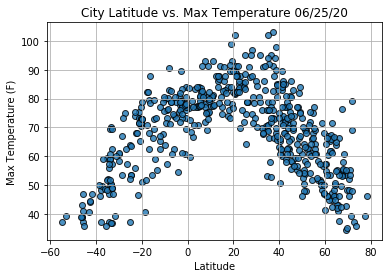

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593121172.245523

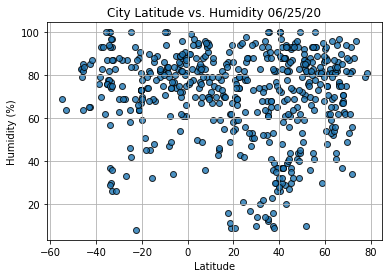

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

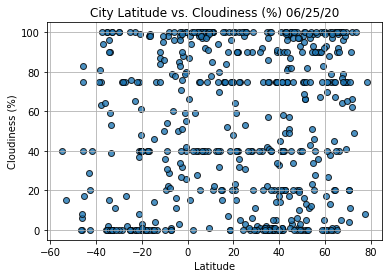

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

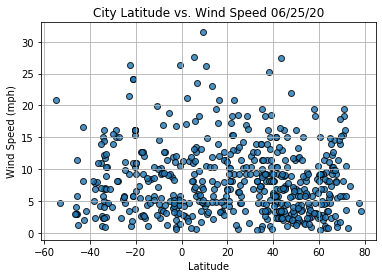

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()